# Dense Networks

This notebook shows how to apply dense networks into real life data

### Import all the needed modules

In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.model_selection import train_test_split

### Define the path of the data source for convenience

Source of the data is the `train.csv` of https://www.kaggle.com/c/microsoft-malware-prediction/data

A subset of the data with 10000 rows is also provided with the presentations named `malware.csv`

In [2]:
CSV_PATH='malware.csv'

### Read the first 10,000 rows of the data

In [3]:
df = pd.read_csv(CSV_PATH, nrows=10000)

### View the loaded dataset

In [4]:
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [5]:
df.tail()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
9995,004aad9e0c5fae58a1cd8a077e53af09,win8defender,1.1.15100.1,4.18.1806.18062,1.273.499.0,0,7.0,0,NaN,53447.0,...,33039.0,0,NaN,0.0,0,0,0.0,0.0,7.0,0
9996,004aadc1779b06368e94b3572f62da6e,win8defender,1.1.15100.1,4.14.17613.18039,1.273.1311.0,0,7.0,0,NaN,23796.0,...,33137.0,1,0.0,0.0,0,0,0.0,0.0,11.0,0
9997,004aade4fdb90b1d764b466829b170aa,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1198.0,0,7.0,0,NaN,43981.0,...,48386.0,0,0.0,0.0,0,0,0.0,0.0,11.0,1
9998,004ab08c3c3e660f85e06fac08c5a0f8,win8defender,1.1.15200.1,4.18.1807.18075,1.275.995.0,0,7.0,0,NaN,53447.0,...,3844.0,0,NaN,0.0,0,0,0.0,1.0,3.0,1
9999,004ab1df5449176bae63dd08eb2a7e3a,win8defender,1.1.14901.4,4.14.17639.18041,1.269.277.0,0,7.0,0,NaN,6554.0,...,69873.0,1,NaN,0.0,0,0,0.0,0.0,15.0,0


### Extract the labels of the data

In [6]:
y = df['HasDetections'].values

In [7]:
y

array([0, 0, 0, ..., 1, 1, 0])

### Select a few columns as features

In [8]:
cols_to_use = ['ProductName', 'Platform', 'OsBuild', 'AVProductsInstalled']
X_raw = df[cols_to_use].copy()
X_raw.head(5)

,ProductName,Platform,OsBuild,AVProductsInstalled
0,win8defender,windows10,17134,1.0
1,win8defender,windows10,17134,1.0
2,win8defender,windows10,17134,1.0
3,win8defender,windows10,17134,1.0
4,win8defender,windows10,17134,1.0


### Check the data for missing data

Here we see a missing data for `AVProductsInstalled`

In [9]:
X_raw.isna().any()

ProductName            False
Platform               False
OsBuild                False
AVProductsInstalled     True
dtype: bool

### Impute the missing data

Using a conservative approach, all missing information are set to 0

In [10]:
X_raw.loc[X_raw['AVProductsInstalled'].isna(), 'AVProductsInstalled'] = 0

In [11]:
X_raw.isna().any(axis=0)

ProductName            False
Platform               False
OsBuild                False
AVProductsInstalled    False
dtype: bool

### Split the data to training and test

In [12]:
train_X_raw, test_X_raw, train_y, test_y = train_test_split(X_raw, y, test_size=0.2, random_state=0, stratify=y)
print(f'train_X_raw: {train_X_raw.shape}')
print(f'test_X_raw: {test_X_raw.shape}')
print(f'train_y: {train_y.shape}')
print(f'test_y: {test_y.shape}')

train_X_raw: (8000, 4)
test_X_raw: (2000, 4)
train_y: (8000,)
test_y: (2000,)


### Define encoders to convert the data to numeric

In [13]:
encoders = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['ProductName', 'Platform', 'OsBuild']),
    ('scaler', StandardScaler(), ['AVProductsInstalled'])
])

### Encode the training data. Note the use of the ```fit_transform``` for the training encoding

In [14]:
train_X = encoders.fit_transform(train_X_raw)

In [15]:
train_X

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.60198557],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557]])

In [16]:
train_X.shape

(8000, 27)

### Encode the test data. Note the use of ``transform`` only for the testing encoding

In [17]:
test_X = encoders.transform(test_X_raw)

In [18]:
test_X

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        , -0.60198557],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  3.23384441],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.31592942],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.31592942]])

In [19]:
test_X.shape

(2000, 27)

### Create a Keras model to train for training

In [20]:
input_ = tf.keras.layers.Input(shape=(27,))
dense1 = tf.keras.layers.Dense(10, activation='relu')(input_)
reg1 = dense1
# reg1 = tf.keras.layers.Dropout(0.1)(dense1)
# reg1 = tf.keras.layers.BatchNormalization()(dense1)
dense2 = tf.keras.layers.Dense(256, activation='relu')(reg1)
reg2 = dense2
# reg2 = tf.keras.layers.Dropout(0.1)(dense2)
# reg2 = tf.keras.layers.BatchNormalization()(dense2)
# dense3 = tf.keras.layers.Dense(256, activation='relu', 
#                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))(reg2)
dense3 = tf.keras.layers.Dense(256, activation='relu')(reg2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense3)

In [21]:
model = tf.keras.Model(inputs=input_, outputs=output)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 69,145
Trainable params: 69,145
Non-trainable params: 0
_________________________________________________________________


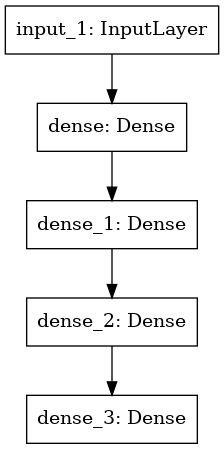

In [23]:
tf.keras.utils.plot_model(model)

In [24]:
model.compile('adam', 'binary_crossentropy')

### Define an early stop

This allows the training to stop if the validation loss does not improve after ```patience``` number of epochs

In [25]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

### Define a model checkpoint

This will save the model based on the parameters passed. In this model checkpoint, the best model is saved

In [26]:
MODEL_PATH = 'checkpoints/model_at_{epoch:02d}.mdl'
os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(MODEL_PATH)

### Train the model

Add a validation split to check for overfitting and provide the early stop and model checkpoint as callbacks

In [27]:
training_history = model.fit(train_X, train_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stop, model_checkpoint])

Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6336/6400 [============================>.] - ETA: 0s - loss: 0.6849WARNING:tensorflow:From /home/snowtsuku/.miniconda/envs/machine-learning/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: checkpoints/model_at_01.mdl/assets
6400/6400 [==============================] - 2s 300us/sample - loss: 0.6848 - val_loss: 0.6867
Epoch 2/100
6400/6400 [==============================] - 1s 188us/sample - loss: 0.6822 - val_loss: 0.6851
Epoch 3/100
6400/6400 [==============================] - 1s 214us/sample - loss: 0.6815 - val_loss: 0.6856
Epoch 4/100
6400/6400 [==============================] - 1s 211us/sample - loss: 0.6805 - val_

In [28]:
!ls checkpoints/

model_at_01.mdl  model_at_07.mdl  model_at_13.mdl  model_at_19.mdl
model_at_02.mdl  model_at_08.mdl  model_at_14.mdl  model_at_20.mdl
model_at_03.mdl  model_at_09.mdl  model_at_15.mdl  model_at_21.mdl
model_at_04.mdl  model_at_10.mdl  model_at_16.mdl  model_at_22.mdl
model_at_05.mdl  model_at_11.mdl  model_at_17.mdl
model_at_06.mdl  model_at_12.mdl  model_at_18.mdl


### Save the model

In [29]:
SAVED_MODEL_PATH = 'model.mdl'
model.save(SAVED_MODEL_PATH)

INFO:tensorflow:Assets written to: model.mdl/assets


### Load the saved model

In [30]:
saved_model = tf.keras.models.load_model(SAVED_MODEL_PATH)

### Verify the structure of the loaded model

In [31]:
saved_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 27)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 69,145
Trainable params: 69,145
Non-trainable params: 0
_________________________________________________________________


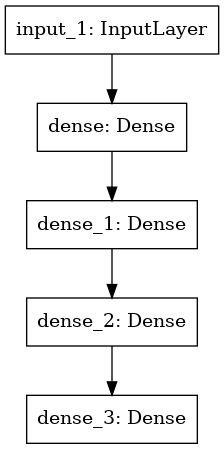

In [32]:
tf.keras.utils.plot_model(saved_model)

### Consume the best model

Prediction and evaluation can be performed on the best model

In [33]:
test_y_pred = saved_model.predict(test_X)

In [34]:
saved_model.evaluate(test_X, test_y)

2000/2000 [==============================] - 0s 110us/sample - loss: 0.6845


0.684491406917572